## **Day 20 of 30 days Data Analysis**

### ***Basic Store Dashboard***

### ***Step 1: Preparation***

In [4]:
import pandas as pd

df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_d14.csv")
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,...,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon,CustomerType_lbl,Year,Month,Day,Weekday,Hour
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,False,True,False,True,Member,2019,1,5,Saturday,13
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,False,False,True,False,Normal,2019,3,8,Friday,10
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,True,False,False,True,Normal,2019,3,3,Sunday,13
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,False,True,False,True,Member,2019,1,27,Sunday,20
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,False,True,False,True,Member,2019,2,8,Friday,10


### ***Step 2: Select KPIs***

*We need a few key metrics for the dashboard:*

*Total Sales*

*Average Rating*

*Top Product line*

*Sales by City*

*Sales by Hour/Weekday*

### ***Step 3: Calculate the indicators***

In [5]:
# KPI 1: total sales
total_sales = df["Sales"].sum()

# KPI 2: rating average
avg_rating = df["Rating"].mean()

# KPI 3: top product line
top_product = df.groupby("Product line")["Sales"].sum().idxmax()

# KPI 4: sales by city
sales_by_city =df.groupby("City_Yangon")["Sales"].sum()

# KPI 5: sales by weekday
sales_by_weekday = df.groupby("Weekday")["Sales"].sum()

### ***Step 4: Visualization (Matplotlib/Seaborn)***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4172\297605271.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="Sales", data=df, estimator=sum, ci=None)


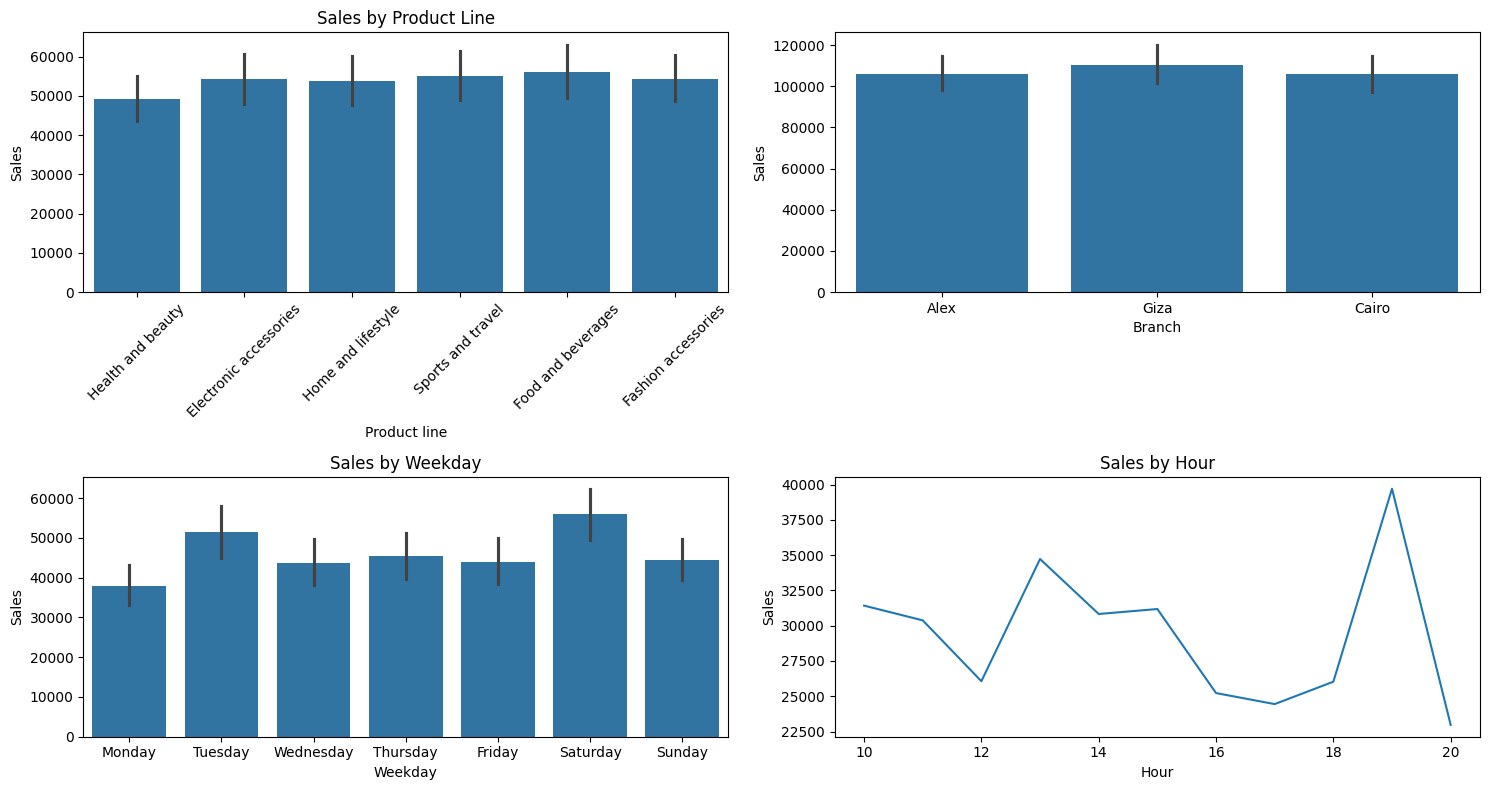

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

# Sales by Product line
plt.subplot(2,2,1)
sns.barplot(x="Product line", y="Sales", data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title("Sales by Product Line")

# Sales by City
plt.subplot(2,2,2)
sns.barplot(x="Branch", y="Sales", data=df, estimator=sum)

# Sales by Weekday
plt.subplot(2,2,3)
sns.barplot(x="Weekday", y="Sales", data=df, estimator=sum,
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Sales by Weekday")

# Sales by Hour
plt.subplot(2,2,4)
sns.lineplot(x="Hour", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Sales by Hour")

plt.tight_layout()
plt.show()

### ***Day 20 - Sales Analysis Dashboard (Matplotlib/Seaborn)***

***- Product line:*** *All product line perform similarly, with* ***Food and Beverages*** *slightly leading.*

***- Branch:*** *Sales are evenly distributed, with* ***Giza*** *showing a small lead.*

***- Weekday:*** ***Saturday*** *has the highest sales, followed by* ***Tuesday***.

***- Hourly:*** *Peak activity observed around* ***19:00***.

*> This completes a static visualization dashboard summarizing sales trends.*

### ***Insights from Time-Based Analysis***

***1. Weekday Trends:***

*- Sales peakes on Saturday, indicating weekends are high-revenue days.*

*- Monday showed the lowest sales, suggesting weaker weekday performance.*

***2. Monthly Trends:***

*- January (Month 1) had the highest total sales, possibly due to post-holiday shopping behavior.*

***3. Hourly Trends:***

*- Peak activity observed around 14:00 (2 PM), indicating optimal engagement during early afternoons.*

***4. Combined Weekday and Hour (Heatmap):***

*- Busiest time slots were Saturday 14:00 and Tuesday 15:00, indicating prime operational periods.*